In [67]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.max_open_warning': 0})
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Preparing data for machine learning

In [68]:
file_path = r"C:\Users\Kamil\OneDrive\Inżynieria danych i Data Science\Tricity-housing\data\data_cleaned_for_real.csv"

data = pd.read_csv(file_path)
data.head()

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny
0,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
1,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
2,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
3,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1
4,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1


In [69]:
# changing Year of construction into age. Using 2025 as reference year
data['Wiek'] = 2025 - data['Rok budowy']
data.head()

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny,Wiek
0,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0
1,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0
2,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0
3,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0
4,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0


In [70]:
# splitting data into sell and rent
sell = data[data['Sprzedaż'] == 1]
rent = data[data['Najem'] == 1]

In [71]:
#extracting price per m2 for each district in order to give it a numerical value
sell['Cena/m2_dzielnicy'] = round(sell['Cena/m2'].groupby(sell['Dzielnica']).transform('mean'), 2)
rent['Cena/m2_dzielnicy'] = round(rent['Cena/m2'].groupby(rent['Dzielnica']).transform('mean'), 2)

<ipython-input-71-1b617c22418a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell['Cena/m2_dzielnicy'] = round(sell['Cena/m2'].groupby(sell['Dzielnica']).transform('mean'), 2)
<ipython-input-71-1b617c22418a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['Cena/m2_dzielnicy'] = round(rent['Cena/m2'].groupby(rent['Dzielnica']).transform('mean'), 2)


In [72]:
sell.head()

,Cena,Miasto,Dzielnica,Pokoje,Pow. całkowita,Rok budowy,Piętro,Liczba pięter,Balkon,Cena/m2,Sprzedaż,Najem,Rynek pierwotny,Wiek,Cena/m2_dzielnicy
0,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0,11458.64
1,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0,11458.64
2,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0,11458.64
3,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0,11458.64
4,518569,Gdynia,Cisowa,2,40.72,2025,1,4,0,12735.00,1,0,1,0,11458.64


In [73]:
cena_dzielnice = sell.groupby('Dzielnica')['Cena/m2'].mean().sort_values()
cena_dzielnice

Dzielnica
Kokoszki                       9516.64
Rudniki                        9547.98
Kowale                         9552.59
Obłuże                         9861.05
Pustki Cisowskie - Demptowo   10058.79
                                ...   
Wyścigi                       21266.07
Świemirowo                    21453.15
Dolny Sopot                   24971.24
Orłowo                        25993.17
Jelitkowo                     35795.84
Name: Cena/m2, Length: 61, dtype: float64

<AxesSubplot:xlabel='Dzielnica'>

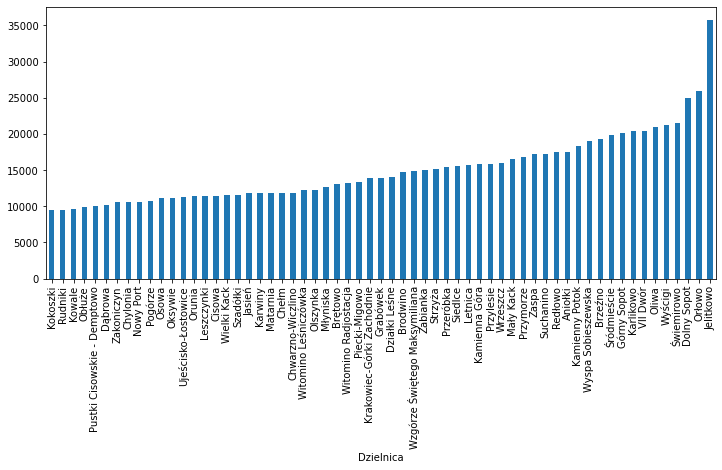

In [74]:
cena_dzielnice.plot.bar(figsize=(12,5))

In [75]:
#droping no more useful columns
sell = sell.drop(columns=['Rok budowy', 'Sprzedaż', 'Najem', 'Cena/m2', 'Dzielnica', 'Miasto'])
rent = rent.drop(columns=['Rok budowy', 'Sprzedaż', 'Najem', 'Cena/m2', 'Dzielnica', 'Miasto'])

In [76]:
sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4421 entries, 0 to 4878
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cena               4421 non-null   int64  
 1   Pokoje             4421 non-null   int64  
 2   Pow. całkowita     4421 non-null   float64
 3   Piętro             4421 non-null   int64  
 4   Liczba pięter      4421 non-null   int64  
 5   Balkon             4421 non-null   int64  
 6   Rynek pierwotny    4421 non-null   int64  
 7   Wiek               4421 non-null   int64  
 8   Cena/m2_dzielnicy  4421 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 474.4 KB


In [77]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 1102 to 4549
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cena               458 non-null    int64  
 1   Pokoje             458 non-null    int64  
 2   Pow. całkowita     458 non-null    float64
 3   Piętro             458 non-null    int64  
 4   Liczba pięter      458 non-null    int64  
 5   Balkon             458 non-null    int64  
 6   Rynek pierwotny    458 non-null    int64  
 7   Wiek               458 non-null    int64  
 8   Cena/m2_dzielnicy  458 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 51.9 KB


# 2. Building price prediction model for sale offers
In order to classify offer as favorable or not, we need to evaluate the price of apartment and compare it with the price from the offer. We are goingto build a price prediction model for this.

In [78]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
# creating sell_scaled as a copy of sell to keep the column names
sell_scaled = sell.copy()

sell_scaler = MinMaxScaler()
sell_scaled[:] = sell_scaler.fit_transform(sell)


sell_scaled.head()

,Cena,Pokoje,Pow. całkowita,Piętro,Liczba pięter,Balkon,Rynek pierwotny,Wiek,Cena/m2_dzielnicy
0,0.04,0.08,0.09,0.00,0.08,0.00,1.00,0.00,0.07
1,0.04,0.08,0.09,0.00,0.08,0.00,1.00,0.00,0.07
2,0.04,0.08,0.09,0.00,0.08,0.00,1.00,0.00,0.07
3,0.04,0.08,0.09,0.00,0.08,0.00,1.00,0.00,0.07
4,0.04,0.08,0.09,0.00,0.08,0.00,1.00,0.00,0.07


In [79]:
# splitting the dataset into train and test subsets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(sell_scaled, train_size = 0.7, test_size = 0.3)

print(df_train.shape)
print(df_test.shape)

(3094, 9)
(1327, 9)


In [80]:
sell.describe()

,Cena,Pokoje,Pow. całkowita,Piętro,Liczba pięter,Balkon,Rynek pierwotny,Wiek,Cena/m2_dzielnicy
count,4421.00,4421.00,4421.00,4421.00,4421.00,4421.00,4421.00,4421.00,4421.00
mean,1001553.58,2.73,62.83,2.49,4.92,0.56,0.33,23.79,15744.48
std,705917.24,1.01,27.38,2.40,3.49,0.50,0.47,34.25,4569.14
min,169000.00,1.00,15.61,1.00,1.00,0.00,0.00,-1.00,9516.64
25%,593840.00,2.00,44.08,1.00,3.00,0.00,0.00,1.00,11527.29
50%,777281.00,3.00,57.10,2.00,4.00,1.00,0.00,5.00,15648.63
75%,1152725.00,3.00,74.00,3.00,5.00,1.00,1.00,40.00,19891.77
max,9725700.00,13.00,288.80,27.00,37.00,1.00,1.00,325.00,35795.84


In [64]:
# spliting the variables in features and result variable
X_train = df_train.iloc[:,1:]
Y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:] 
Y_test = df_test.iloc[:,0]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3094, 8)
(3094,)
(1327, 8)
(1327,)


In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

R2_train = []
R2_test = []
CV = []

def predict_model(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train,Y_train)
            
    # R2 score of train set
    Y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(Y_train,Y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    Y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(Y_test,Y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,Y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Y_test vs Y_train scatter plot
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Y_train vs Y_pred_train')
    ax[0].scatter(x = Y_train, y = Y_pred_train)
    ax[0].set_xlabel('Y_train')
    ax[0].set_ylabel('Y_pred_train')
    ax[1].set_title('Y_test vs Y_pred_test')
    ax[1].scatter(x = Y_test, y = Y_pred_test)
    ax[1].set_xlabel('Y_test')
    ax[1].set_ylabel('Y_pred_test')
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    return model

Train R2-score : 0.7
Test R2-score : 0.77
Train CV scores : [0.64515308 0.70091943 0.71112812 0.71093799 0.70410136]
Train CV mean : 0.69


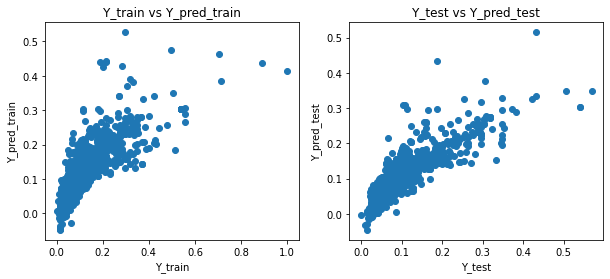

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV



linear_model = predict_model(LinearRegression(), 'Linear Regression', X_train, Y_train, X_test, Y_test)

Train R2-score : 0.7
Test R2-score : 0.77
Train CV scores : [0.64609646 0.70392567 0.71217552 0.70225321 0.69887345]
Train CV mean : 0.69


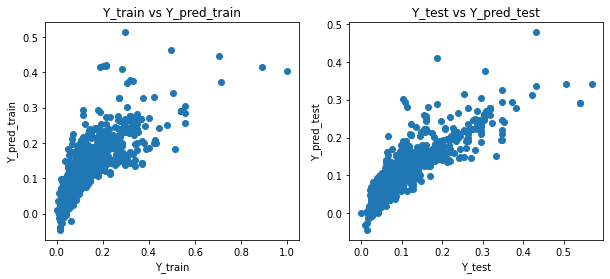

In [18]:
ridge_model = predict_model(Ridge(), 'Ridge Regression', X_train, Y_train, X_test, Y_test)

Train R2-score : 0.49
Test R2-score : 0.56
Train CV scores : [0.62427898 0.66300929 0.53762211 0.45954726 0.64294649]
Train CV mean : 0.59


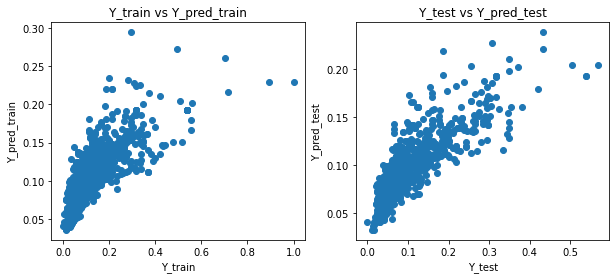

In [19]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

lasso_model = predict_model(ls_rs, 'Lasso Regression', X_train, Y_train, X_test, Y_test)

Train R2-score : 0.92
Test R2-score : 0.87
Train CV scores : [0.78790081 0.8505936  0.77456329 0.82062135 0.82304292]
Train CV mean : 0.81


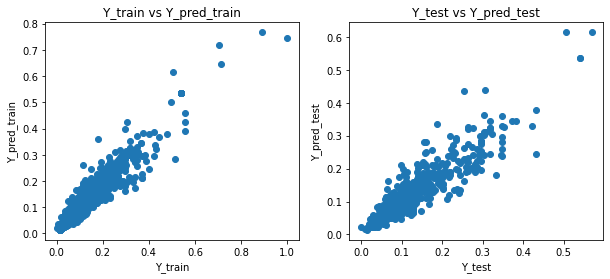

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of features to be considered at each split
max_features=[1.0,'sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

sell_forest_model = predict_model(rf_rs, 'Random Forrest Regression', X_train, Y_train, X_test, Y_test)

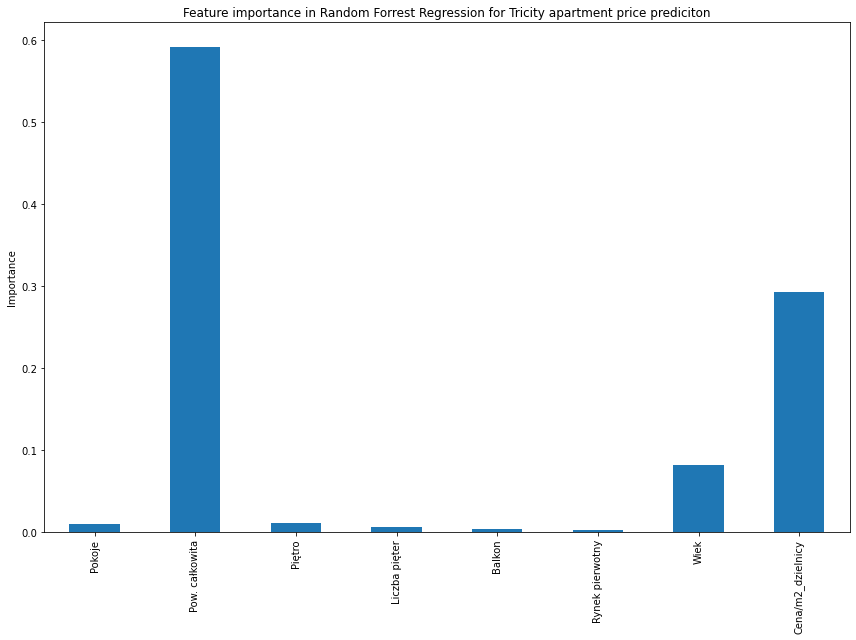

In [21]:
importances = sell_forest_model.best_estimator_.feature_importances_
feature_names = sell.iloc[:, 1:].columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=[12,9])
forest_importances.plot.bar()
ax.set_title("Feature importance in Random Forrest Regression for Tricity apartment price prediciton")
ax.set_ylabel("Importance")
fig.tight_layout()

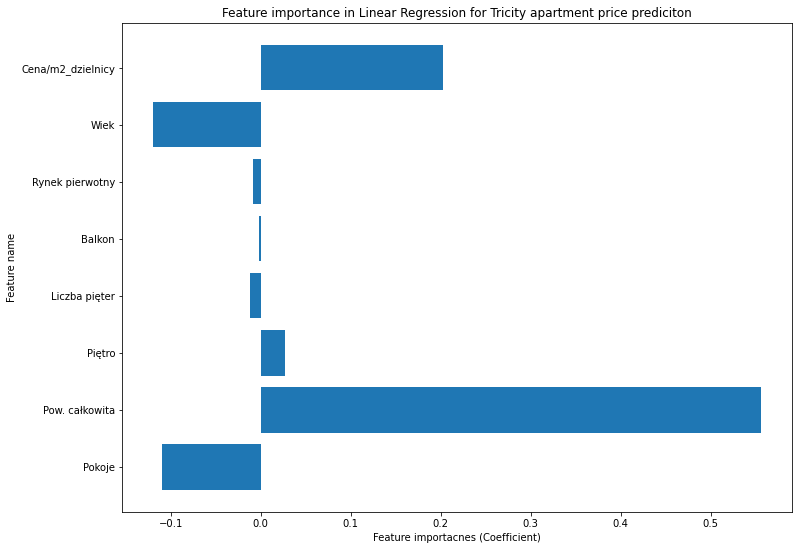

In [22]:
coeficients = linear_model.coef_

plt.figure(figsize=[12,9])
plt.barh(feature_names, coeficients)
plt.xlabel("Feature importacnes (Coefficient)")
plt.ylabel("Feature name")
plt.title("Feature importance in Linear Regression for Tricity apartment price prediciton")
plt.show()

# 3. Building price prediction model for rent offers
Recreating steps from sale offers to renting market

In [81]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
# creating sell_scaled as a copy of sell to keep the column names
rent_scaled = rent.copy()

rent_scaler = MinMaxScaler()
rent_scaled[:] = rent_scaler.fit_transform(rent)


rent_scaled.head()

,Cena,Pokoje,Pow. całkowita,Piętro,Liczba pięter,Balkon,Rynek pierwotny,Wiek,Cena/m2_dzielnicy
1102,0.11,0.25,0.14,0.00,0.15,1.00,0.00,0.50,0.46
1103,1.00,0.50,0.36,0.00,0.11,1.00,0.00,0.03,0.74
1104,0.09,0.25,0.16,0.12,0.11,0.00,0.00,0.20,0.08
1105,0.32,0.25,0.31,0.15,0.15,1.00,0.00,0.10,0.54
1106,0.29,0.25,0.17,0.00,0.59,1.00,0.00,0.03,0.74


In [82]:
# splitting the dataset into train and test subsets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(rent_scaled, train_size = 0.7, test_size = 0.3)

print(df_train.shape)
print(df_test.shape)

(320, 9)
(138, 9)


In [83]:
rent.describe()

,Cena,Pokoje,Pow. całkowita,Piętro,Liczba pięter,Balkon,Rynek pierwotny,Wiek,Cena/m2_dzielnicy
count,4421.00,4421.00,4421.00,4421.00,4421.00,4421.00,4421.00,4421.00,4421.00
mean,1001553.58,2.73,62.83,2.49,4.92,0.56,0.33,23.79,15744.48
std,705917.24,1.01,27.38,2.40,3.49,0.50,0.47,34.25,4569.14
min,169000.00,1.00,15.61,1.00,1.00,0.00,0.00,-1.00,9516.64
25%,593840.00,2.00,44.08,1.00,3.00,0.00,0.00,1.00,11527.29
50%,777281.00,3.00,57.10,2.00,4.00,1.00,0.00,5.00,15648.63
75%,1152725.00,3.00,74.00,3.00,5.00,1.00,1.00,40.00,19891.77
max,9725700.00,13.00,288.80,27.00,37.00,1.00,1.00,325.00,35795.84


In [26]:
# spliting the variables in features and result variable
X_train = df_train.iloc[:,1:]
Y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:] 
Y_test = df_test.iloc[:,0]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(320, 8)
(320,)
(138, 8)
(138,)


In [27]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

R2_train = []
R2_test = []
CV = []

def predict_model(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train,Y_train)
            
    # R2 score of train set
    Y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(Y_train,Y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    Y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(Y_test,Y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,Y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Y_test vs Y_train scatter plot
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Y_train vs Y_pred_train')
    ax[0].scatter(x = Y_train, y = Y_pred_train)
    ax[0].set_xlabel('Y_train')
    ax[0].set_ylabel('Y_pred_train')
    ax[1].set_title('Y_test vs Y_pred_test')
    ax[1].scatter(x = Y_test, y = Y_pred_test)
    ax[1].set_xlabel('Y_test')
    ax[1].set_ylabel('Y_pred_test')
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    return model

Train R2-score : 0.63
Test R2-score : 0.5
Train CV scores : [0.51960392 0.4600112  0.57332439 0.62763097 0.65887363]
Train CV mean : 0.57


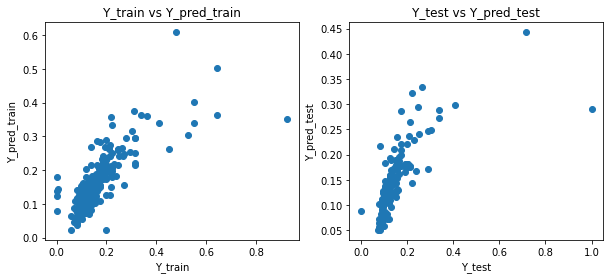

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV



linear_model = predict_model(LinearRegression(), 'Linear Regression', X_train, Y_train, X_test, Y_test)

Train R2-score : 0.6
Test R2-score : 0.46
Train CV scores : [0.50510047 0.47013    0.46155834 0.71425425 0.646615  ]
Train CV mean : 0.56


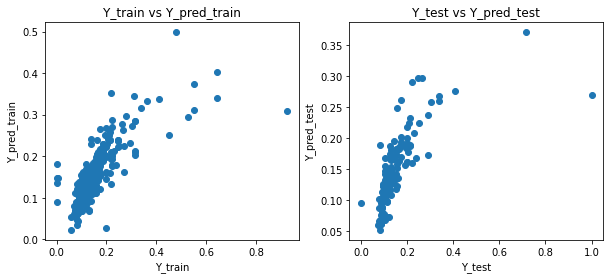

In [29]:
ridge_model = predict_model(Ridge(), 'Ridge Regression', X_train, Y_train, X_test, Y_test)

Train R2-score : 0.61
Test R2-score : 0.45
Train CV scores : [0.56996774 0.49226873 0.48040573 0.69642745 0.64458314]
Train CV mean : 0.58


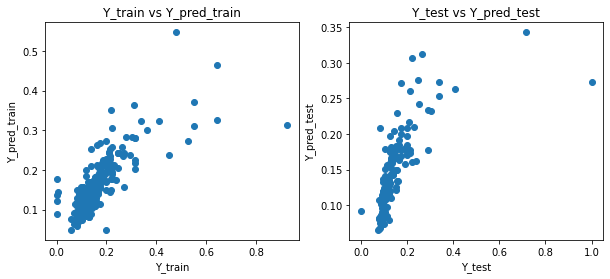

In [30]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

lasso_model = predict_model(ls_rs, 'Lasso Regression', X_train, Y_train, X_test, Y_test)

Train R2-score : 0.82
Test R2-score : 0.45
Train CV scores : [0.50666224 0.45129585 0.45527065 0.72716884 0.44574367]
Train CV mean : 0.52


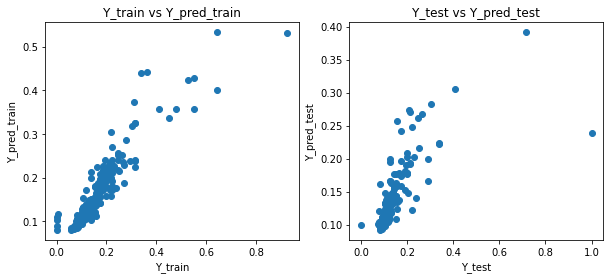

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=[1.0,'sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

rent_forest_model = predict_model(rf_rs, 'Random Forrest Regression', X_train, Y_train, X_test, Y_test)

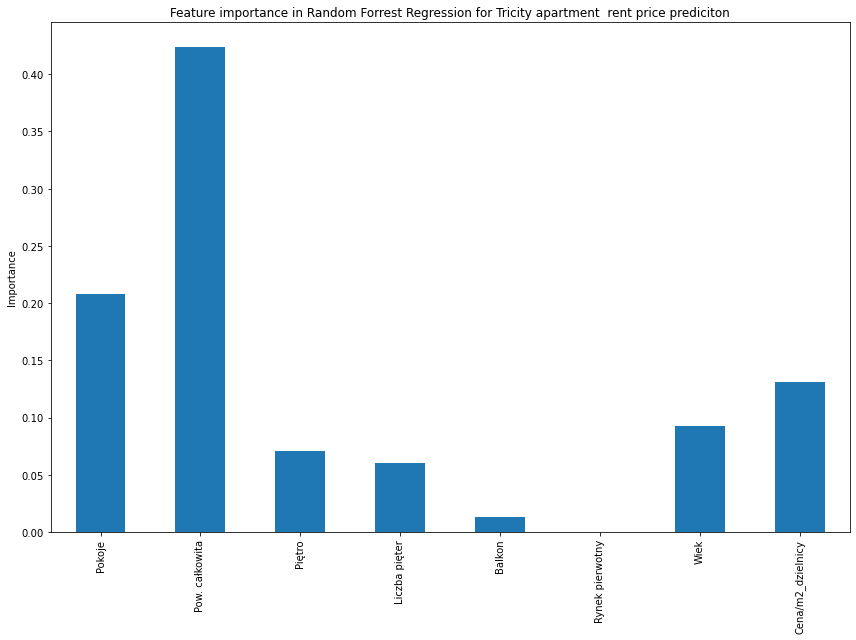

In [32]:
importances = rent_forest_model.best_estimator_.feature_importances_
feature_names = sell.iloc[:, 1:].columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=[12,9])
forest_importances.plot.bar()
ax.set_title("Feature importance in Random Forrest Regression for Tricity apartment  rent price prediciton")
ax.set_ylabel("Importance")
fig.tight_layout()

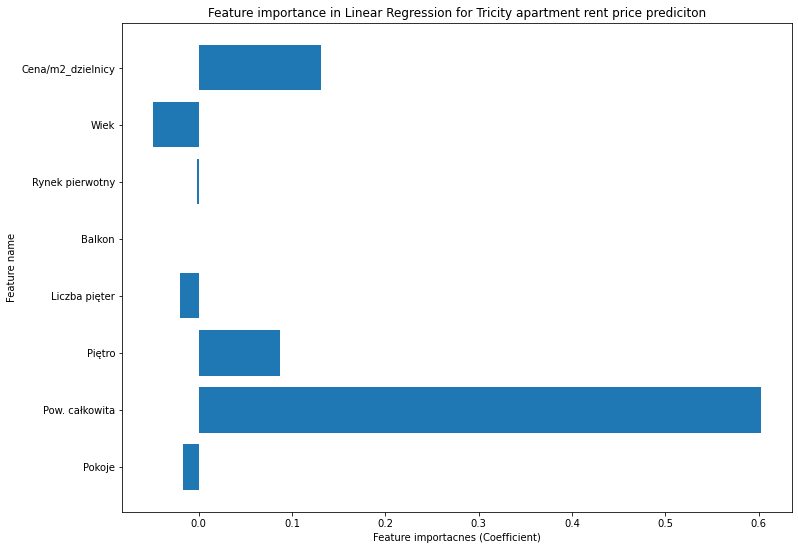

In [33]:
coeficients = linear_model.coef_

plt.figure(figsize=[12,9])
plt.barh(feature_names, coeficients)
plt.xlabel("Feature importacnes (Coefficient)")
plt.ylabel("Feature name")
plt.title("Feature importance in Linear Regression for Tricity apartment rent price prediciton")
plt.show()

# 4. Classification for attractive offers
In order to classify offer as attractive or not we need to compare estimated with the offering price. When it is greater than the offered one - the offer is attractive

In [85]:
sell_pred_price_scaled = sell_forest_model.predict(sell_scaled.iloc[:, 1:])
rent_pred_price_scaled = rent_forest_model.predict(rent_scaled.iloc[:, 1:])
sell_pred_price_scaled

array([0.03415443, 0.03415443, 0.03415443, ..., 0.15094903, 0.18774114,
       0.17304167])

In [86]:
#inversing the scaled data. We need to make a copy of whole dataset for predicted price in order to use the scaler - it needs same size input
sell_pred = sell_scaled.copy()
sell_pred['Cena'] = sell_pred_price_scaled
sell_pred[:] = sell_scaler.inverse_transform(sell_pred)

rent_pred = rent_scaled.copy()
rent_pred['Cena'] = rent_pred_price_scaled
rent_pred[:] = rent_scaler.inverse_transform(rent_pred)


sell_pred


,Cena,Pokoje,Pow. całkowita,Piętro,Liczba pięter,Balkon,Rynek pierwotny,Wiek,Cena/m2_dzielnicy
0,495403.60,2.00,40.72,1.00,4.00,0.00,1.00,0.00,11458.64
1,495403.60,2.00,40.72,1.00,4.00,0.00,1.00,0.00,11458.64
2,495403.60,2.00,40.72,1.00,4.00,0.00,1.00,0.00,11458.64
3,495403.60,2.00,40.72,1.00,4.00,0.00,1.00,0.00,11458.64
4,495403.60,2.00,40.72,1.00,4.00,0.00,1.00,0.00,11458.64
...,...,...,...,...,...,...,...,...,...
4874,1261919.21,4.00,73.27,2.00,2.00,0.00,0.00,110.00,20158.31
4875,2386295.76,5.00,106.25,3.00,3.00,0.00,1.00,2.00,20158.31
4876,1611574.63,5.00,93.10,2.00,3.00,1.00,0.00,75.00,20158.31
4877,1963185.71,3.00,80.00,3.00,3.00,1.00,0.00,125.00,24971.24


In [87]:
rent_pred

,Cena,Pokoje,Pow. całkowita,Piętro,Liczba pięter,Balkon,Rynek pierwotny,Wiek,Cena/m2_dzielnicy
1102,2682.73,2.00,44.00,1.00,5.00,1.00,0.00,65.00,66.45
1103,5360.81,3.00,84.00,1.00,4.00,1.00,0.00,5.00,82.61
1104,2272.45,2.00,49.00,4.00,4.00,0.00,0.00,27.00,44.94
1105,5328.08,2.00,76.08,5.00,5.00,1.00,0.00,14.00,71.24
1106,3795.04,2.00,50.00,1.00,17.00,1.00,0.00,5.00,82.61
...,...,...,...,...,...,...,...,...,...
4545,2466.63,3.00,66.26,4.00,4.00,1.00,0.00,50.00,63.37
4546,2973.90,2.00,38.00,2.00,2.00,1.00,0.00,6.00,76.12
4547,9419.88,5.00,132.00,3.00,3.00,0.00,0.00,11.00,63.37
4548,5152.96,3.00,90.00,1.00,3.00,1.00,0.00,55.00,63.37


In [88]:
sell['Cena estymowana'] = sell_pred['Cena']
sell['Różnica cen'] = sell['Cena estymowana'] - sell['Cena']
rent['Cena estymowana'] = rent_pred['Cena']
rent['Różnica cen'] = rent['Cena estymowana'] - rent['Cena']

In [89]:
sell['Różnica cen [%]'] = abs((sell['Cena estymowana'] - sell['Cena'])/sell['Cena'])*100
rent['Różnica cen [%]'] = abs((rent['Cena estymowana'] - rent['Cena'])/rent['Cena'])*100

In [92]:
sell['Oferta atrakcyjna'] = ['Tak' if x>0 else 'Nie' for x in sell['Różnica cen']]
rent['Oferta atrakcyjna'] = ['Tak' if x>0 else 'Nie' for x in rent['Różnica cen']]
sell

,Cena,Pokoje,Pow. całkowita,Piętro,Liczba pięter,Balkon,Rynek pierwotny,Wiek,Cena/m2_dzielnicy,Cena estymowana,Różnica cen,Różnica cen [%],Oferta atrakcyjna
0,518569,2,40.72,1,4,0,1,0,11458.64,495403.60,-23165.40,4.47,Nie
1,518569,2,40.72,1,4,0,1,0,11458.64,495403.60,-23165.40,4.47,Nie
2,518569,2,40.72,1,4,0,1,0,11458.64,495403.60,-23165.40,4.47,Nie
3,518569,2,40.72,1,4,0,1,0,11458.64,495403.60,-23165.40,4.47,Nie
4,518569,2,40.72,1,4,0,1,0,11458.64,495403.60,-23165.40,4.47,Nie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,1500000,4,73.27,2,2,0,0,110,20158.31,1261919.21,-238080.79,15.87,Nie
4875,2337500,5,106.25,3,3,0,1,2,20158.31,2386295.76,48795.76,2.09,Tak
4876,1649000,5,93.10,2,3,1,0,75,20158.31,1611574.63,-37425.37,2.27,Nie
4877,1500000,3,80.00,3,3,1,0,125,24971.24,1963185.71,463185.71,30.88,Tak


In [93]:
rent

,Cena,Pokoje,Pow. całkowita,Piętro,Liczba pięter,Balkon,Rynek pierwotny,Wiek,Cena/m2_dzielnicy,Cena estymowana,Różnica cen,Różnica cen [%],Oferta atrakcyjna
1102,2500,2,44.00,1,5,1,0,65,66.45,2682.73,182.73,7.31,Tak
1103,21600,3,84.00,1,4,1,0,5,82.61,5360.81,-16239.19,75.18,Nie
1104,2100,2,49.00,4,4,0,0,27,44.94,2272.45,172.45,8.21,Tak
1105,7000,2,76.08,5,5,1,0,14,71.24,5328.08,-1671.92,23.88,Nie
1106,6500,2,50.00,1,17,1,0,5,82.61,3795.04,-2704.96,41.61,Nie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,250,3,66.26,4,4,1,0,50,63.37,2466.63,2216.63,886.65,Tak
4546,2900,2,38.00,2,2,1,0,6,76.12,2973.90,73.90,2.55,Tak
4547,12000,5,132.00,3,3,0,0,11,63.37,9419.88,-2580.12,21.50,Nie
4548,6000,3,90.00,1,3,1,0,55,63.37,5152.96,-847.04,14.12,Nie


In [94]:
sell["Różnica cen [%]"].mean()

11.506177719527441

In [95]:
rent["Różnica cen [%]"].mean()

22.078476050088888

In [40]:
sell["Oferta atrakcyjna"].value_counts()

Tak    2443
Nie    1978
Name: Oferta atrakcyjna, dtype: int64

In [96]:
rent["Oferta atrakcyjna"].value_counts()

Tak    288
Nie    170
Name: Oferta atrakcyjna, dtype: int64